In [1]:
cd ..

/home/msi/projects/diplomka


In [2]:
import torch as pt

In [3]:
import pandas as pd

In [4]:
from glob import glob 

In [5]:
list(glob('data/out/CA_SFU_T2-CSCS_LCG2/*.json'))

['data/out/CA_SFU_T2-CSCS_LCG2/206.12.127.30->148.187.129.15.json',
 'data/out/CA_SFU_T2-CSCS_LCG2/206.12.127.40->148.187.129.15.json']

In [6]:
df = pd.read_json("data/out/CA_SFU_T2-CSCS_LCG2/206.12.127.30->148.187.129.15.json").T

## n_hops

In [7]:
df['n_hops_anomaly'] = df['n_hops'].apply(lambda x: x[0])
df['n_hops_anomaly'] = df['n_hops_anomaly'].apply(lambda x: True if x=='true' else False)

In [8]:
df['n_hops_prob'] = df['n_hops'].apply(lambda x: x[1])

In [9]:
df.drop(columns='n_hops', inplace=True)

## path

In [10]:
df['path_anomaly'] = df['path'].apply(lambda x: x[0])

In [11]:
df['path_prob'] = df['path'].apply(lambda x: x[1])

In [12]:
df.drop(columns='path', inplace=True)

## IP 

In [13]:
df['ip_has_anomaly'] = df['ip'].apply(lambda x: True if x[0]=='true' else False)

In [14]:
df['ip_probs'] = df['ip'].apply(lambda x: x[1])

In [15]:
df['mean_ip_prob'] = df['ip'].apply(lambda x: x[2])

In [16]:
df.drop(columns='ip', inplace=True)

## ASN

In [17]:
df['asn_has_anomaly'] = df['asn'].apply(lambda x: True if x[0]=='true' else False)

In [18]:
df['asn_probs'] = df['asn'].apply(lambda x: x[1])

In [19]:
df['mean_asn_prob'] = df['asn'].apply(lambda x: x[2])

In [20]:
df.drop(columns='asn', inplace=True)

## Reaching destination

In [21]:
df['reached_anomaly'] = df['reached'].apply(lambda x: x[0])

In [22]:
df['reached_prob'] = df['reached'].apply(lambda x: x[1])

In [23]:
df['reached_score'] = df['reached'].apply(lambda x: x[2])

In [24]:
df.drop(columns='reached', inplace=True)

## rtts

In [25]:
df['rtt_anomalies'] = df['rtts'].apply(lambda x: x[0])

In [26]:
df['rtt_probs'] = df['rtts'].apply(lambda x:  x[1])

In [27]:
df.drop(columns='rtts', inplace=True)

## tlls

In [28]:
df['ttl_anomalies'] = df['ttls'].apply(lambda x: x[0])

In [29]:
df['ttl_probs'] = df['ttls'].apply(lambda x: x[1])

In [30]:
df.drop(columns='ttls', inplace=True)

In [31]:
pd.options.display.max_columns = None

In [32]:
import numpy as np

In [33]:
df.columns

Index(['ts', 'ip_hash', 'unique_asns', 'has_anomaly', 'anom_share',
       'path_hash', 'n_hops_anomaly', 'n_hops_prob', 'path_anomaly',
       'path_prob', 'ip_has_anomaly', 'ip_probs', 'mean_ip_prob',
       'asn_has_anomaly', 'asn_probs', 'mean_asn_prob', 'reached_anomaly',
       'reached_prob', 'reached_score', 'rtt_anomalies', 'rtt_probs',
       'ttl_anomalies', 'ttl_probs'],
      dtype='object')

In [34]:
df.head()

,ts,ip_hash,unique_asns,has_anomaly,anom_share,path_hash,n_hops_anomaly,n_hops_prob,path_anomaly,path_prob,ip_has_anomaly,ip_probs,mean_ip_prob,asn_has_anomaly,asn_probs,mean_asn_prob,reached_anomaly,reached_prob,reached_score,rtt_anomalies,rtt_probs,ttl_anomalies,ttl_probs
0,1672531433000,17fc944234518181bd79a9e48ee07cfeef912910,dd1e6b3bea85b90ad53e87c80269963fa24b08a7,True,0.407895,ca070bc63de20f18b705ad316f3836f91c5154a7,False,0.000000,True,1.0,False,"[1.0, 1.0, 0.6666666666666661, 1.0, 1.0, 1.0, ...",0.977778,False,"[1.0, 1.0, 0.6666666666666661, 1.0, 1.0, 1.0, ...",0.896825,False,0.5,0.0,"[False, False, False, False, False, False, Fal...","[0.052098555279113, 0.201657544872298, 0.01425...","[False, True, False, False, False, False, Fals...","[1.0, 0.006737946999085, 1.0, 1.0, 1.0, 1.0, 1..."
1,1672531570000,17fc944234518181bd79a9e48ee07cfeef912910,dd1e6b3bea85b90ad53e87c80269963fa24b08a7,True,0.325843,ca070bc63de20f18b705ad316f3836f91c5154a7,False,0.080997,False,1.0,False,"[1.0, 0.75, 0.6000000000000001, 1.0, 1.0, 1.0,...",0.956667,False,"[1.0, 0.75, 0.6000000000000001, 1.0, 0.875, 0....",0.808821,False,1.0,0.0,"[False, False, False, False, False, False, Fal...","[0.232268899851086, 0.25997015393746703, 0.146...","[True, False, True, True, True, True, True, Tr...","[0.035673993347252006, 0.08208499862389801, 0...."
2,1672532092000,17fc944234518181bd79a9e48ee07cfeef912910,dd1e6b3bea85b90ad53e87c80269963fa24b08a7,True,0.310345,ca070bc63de20f18b705ad316f3836f91c5154a7,False,0.092680,False,1.0,False,"[1.0, 0.6666666666666661, 0.5714285714285711, ...",0.949206,False,"[1.0, 0.6666666666666661, 0.5714285714285711, ...",0.783097,False,1.0,0.0,"[False, False, False, False, False, False, Fal...","[0.284138261797717, 0.307265747496241, 0.16965...","[False, False, True, True, True, True, True, T...","[0.135335283236612, 0.18887560283756102, 0.035..."
3,1672532162000,17fc944234518181bd79a9e48ee07cfeef912910,dd1e6b3bea85b90ad53e87c80269963fa24b08a7,False,0.2,ca070bc63de20f18b705ad316f3836f91c5154a7,False,0.096937,False,1.0,False,"[1.0, 0.625, 0.555555555555555, 1.0, 1.0, 1.0,...",0.945370,False,"[1.0, 0.625, 0.555555555555555, 1.0, 0.85, 0.8...",0.770519,False,1.0,0.0,"[False, False, False, False, False, False, Fal...","[0.269737109452101, 0.28877067368491, 0.189653...","[False, False, False, False, False, False, Fal...","[0.23965103644177502, 0.28650479686019004, 0.0..."
4,1672532696000,17fc944234518181bd79a9e48ee07cfeef912910,dd1e6b3bea85b90ad53e87c80269963fa24b08a7,False,0.2,ca070bc63de20f18b705ad316f3836f91c5154a7,False,0.098923,False,1.0,False,"[1.0, 0.6000000000000001, 0.5454545454545451, ...",0.943030,False,"[1.0, 0.6000000000000001, 0.5454545454545451, ...",0.763034,False,1.0,0.0,"[False, False, False, False, False, False, Fal...","[0.347659692271221, 0.366545724499974, 0.20750...","[False, False, False, False, False, False, Fal...","[0.329192987807905, 0.367879441171442, 0.13533..."


In [35]:
anom_columns = list(filter(lambda x: x.endswith('anomaly'), df.columns))[1:]
anom_columns


['n_hops_anomaly',
 'path_anomaly',
 'ip_has_anomaly',
 'asn_has_anomaly',
 'reached_anomaly']

In [36]:
df[anom_columns].mean(axis=1)

0        0.2
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
22180    0.0
22181    0.0
22182    0.0
22183    0.0
22184    0.0
Length: 22185, dtype: float64

In [37]:
prob_columns = list(filter(lambda x: x.endswith('prob'), df.columns))
prob_columns

['n_hops_prob', 'path_prob', 'mean_ip_prob', 'mean_asn_prob', 'reached_prob']

<Axes: >

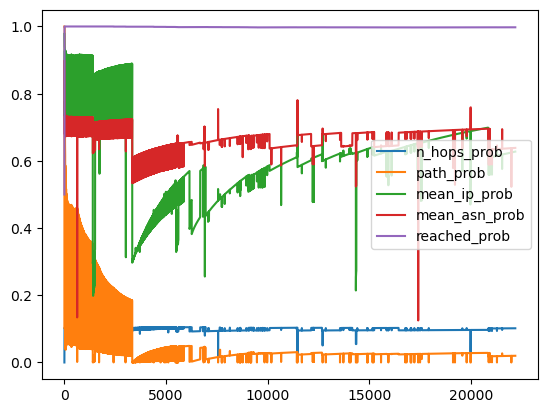

In [38]:
df[prob_columns].plot()

In [39]:
probs_columns = list(filter(lambda x: x.endswith('probs'), df.columns))
probs_columns


['ip_probs', 'asn_probs', 'rtt_probs', 'ttl_probs']

In [40]:
series = df[probs_columns].copy()

In [41]:
from sklearn.cluster import DBSCAN

In [42]:
! conda list | grep pytorch

pytorch                   2.0.1           cpu_py310hab5cca8_0  
pytorch-lightning         2.0.4              pyhd8ed1ab_0    conda-forge


In [45]:
import torch as pt
import pytorch_lightning as pl


In [46]:
data = series[['rtt_probs']]

In [107]:
from tslearn.metrics import dtw, ctw

<Axes: >

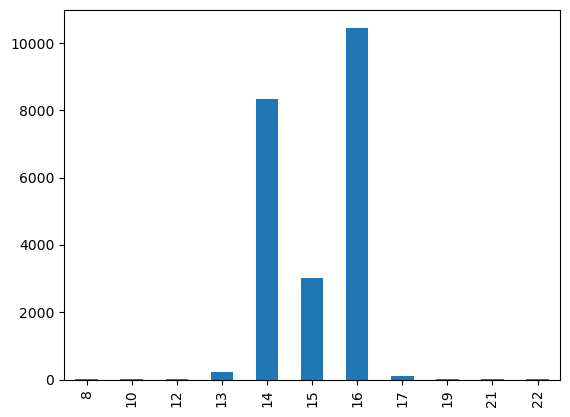

In [47]:
data.apply(lambda x: len(x[0]), axis=1).value_counts().sort_index().plot(kind='bar')

In [141]:
X = data.values.tolist()

In [142]:
X = [x[0] + [0] * (22-len(x[0])) for x in X]

In [143]:
X

[[0.052098555279113,
  0.201657544872298,
  0.014252761909089001,
  0.013159029345575002,
  0.093255043190377,
  0.12309954594289,
  0.138746436138555,
  0.170001472269864,
  0.174369190202868,
  0.19912895731389302,
  0.199384151977706,
  0.199425544153242,
  0.19946134173224803,
  0.19945046186387602,
  0.199448420812169,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0.232268899851086,
  0.25997015393746703,
  0.146911585098498,
  0.1447050821304,
  0.259640692979001,
  0.313384352098319,
  0.34970852760624604,
  0.457728636336993,
  0.47774040996972306,
  0.6862888005276391,
  0.6897858379599191,
  0.690344560199408,
  0.690835021645338,
  0.6907019347638841,
  0.69067318741812,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0.284138261797717,
  0.307265747496241,
  0.16965487067468202,
  0.11569308525782601,
  0.299801957478027,
  0.361868488426803,
  0.36966242501321805,
  0.528537476910751,
  0.552275658287367,
  0.792459844762732,
  0.796495266795845,
  0.797150843979996,
  0.797720329467535,
  

In [144]:
X = np.array(X)

In [145]:

from tqdm import tqdm

In [146]:
progress = tqdm()

0it [01:54, ?it/s]


In [147]:
def wrapper(*args, **kwargs):
    progress.update()
    return dtw(*args, **kwargs)

In [148]:

model = DBSCAN(eps=0.8, min_samples=10, metric='euclidean', n_jobs=-1)

In [149]:
X

array([[0.05209856, 0.20165754, 0.01425276, ..., 0.        , 0.        ,
        0.        ],
       [0.2322689 , 0.25997015, 0.14691159, ..., 0.        , 0.        ,
        0.        ],
       [0.28413826, 0.30726575, 0.16965487, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.80506551, 1.81352733, 0.76613811, ..., 0.        , 0.        ,
        0.        ],
       [1.78324676, 1.80512625, 0.70413034, ..., 0.        , 0.        ,
        0.        ],
       [1.04732658, 1.16222368, 0.29539351, ..., 0.        , 0.        ,
        0.        ]])

In [150]:
X/=X.max(axis=0)

In [151]:
X

array([[0.02801476, 0.10835241, 0.01794837, ..., 0.        , 0.        ,
        0.        ],
       [0.1248971 , 0.1396843 , 0.18500439, ..., 0.        , 0.        ,
        0.        ],
       [0.15278862, 0.16509665, 0.21364479, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97063125, 0.97442453, 0.96479056, ..., 0.        , 0.        ,
        0.        ],
       [0.95889873, 0.96991055, 0.88670476, ..., 0.        , 0.        ,
        0.        ],
       [0.56317508, 0.62447322, 0.37198628, ..., 0.        , 0.        ,
        0.        ]])

In [152]:
clusters = model.fit_predict(X)

In [153]:
clusters    

array([0, 0, 0, ..., 0, 0, 0])

In [154]:
np.unique(clusters)

array([-1,  0,  1,  2,  3,  4])

In [155]:
import matplotlib.pyplot as plt

In [156]:
import numpy as np
from sklearn.manifold import TSNE
# X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X, clusters)
X_embedded.shape

(22185, 2)

In [157]:
df = pd.DataFrame(X_embedded, columns=['x', 'y'])

In [158]:
df['cluster'] = clusters    

In [159]:
df['data'] = X.tolist()

<AxesSubplot: xlabel='x', ylabel='y'>

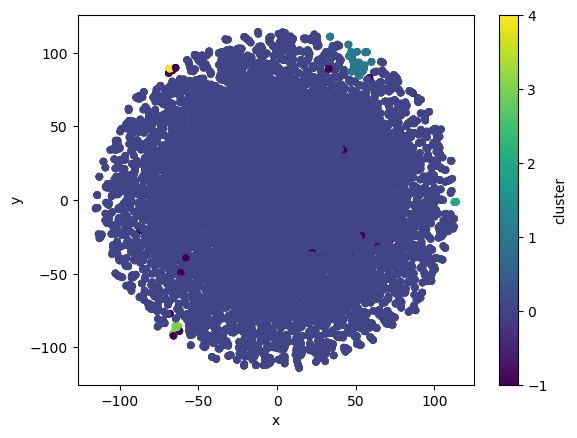

In [160]:
df.plot(kind='scatter', x='x', y='y', c='cluster', cmap='viridis')

In [64]:
tmp = pd.DataFrame(X)
tmp['class'] = clusters

In [161]:
tmp['class'].value_counts()

class
 0    24231
 1       19
-1       13
Name: count, dtype: int64

<AxesSubplot: >

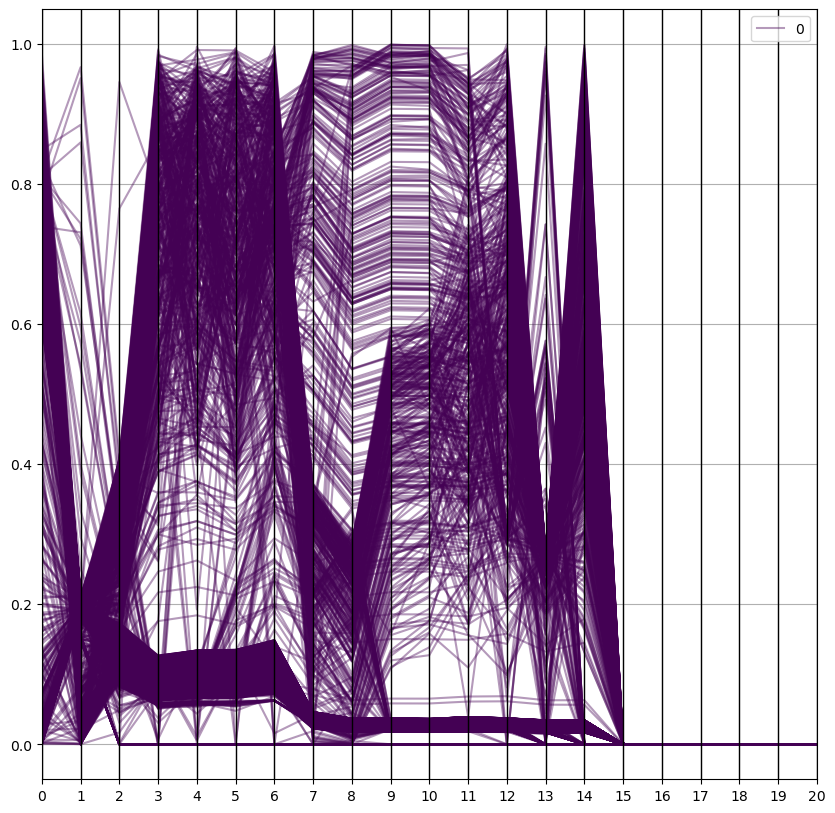

In [167]:
fig = plt.figure(figsize=(10, 10))
pd.plotting.parallel_coordinates(tmp[(tmp['class']==0)].sample(n=2500), 'class', alpha=0.4, colormap='viridis')

In [49]:
import torch.nn as nn 

In [50]:
from torch import optim

In [110]:
from torch.utils.data import Dataset

In [112]:
import copy
import random

In [113]:
class AnomalyDataset(Dataset):
    def __init__(self, data: list[list[int]], pad_size, seed):
        self.seed = seed
        self.pad_size = pad_size
        self.data = self.pad_data(data)

        self.shuffled_data = copy.deepcopy(data)
        # random sort based on seed
        random.Random(seed).shuffle(self.shuffled_data)


    def pad_data(self, data):
        return [row + [0] * (self.pad_size - len(row)) for row in data]

    def __getitem__(self, index):
        return self.data[index], self.shuffled_data[index]

    def __len__(self):
        return len(self.data)

In [114]:
from sklearn.model_selection import train_test_split

In [116]:
train, val = train_test_split(series, test_size=0.4, random_state=42)

In [117]:
val, test = train_test_split(val, test_size=0.5, random_state=42)

In [118]:
train.shape

(13311, 4)

In [119]:
test.shape

(4437, 4)

In [120]:
val.shape


(4437, 4)

In [ ]:
class MyDataLoader(pl.LightningDataModule):
    def __init__(self, df: pd.DataFrame, batch_size: int = 32, random_seed: int = 42):
        super().__init__()
        self.df = df
        self.batch_size = batch_size
        self.random_seed = random_seed
        self.train, self.test, self.val = self.split(df)
        

    def split(self, df):
        train, val = train_test_split(df, test_size=0.4, random_state=self.random_seed)
        val, test = train_test_split(val, test_size=0.5, random_state=self.random_seed)
        return train, test, val
           
    def train_dataloader(self):
        return 

    def val_dataloader(self):
        return

    def test_dataloader(self):
        return 

    def predict_dataloader(self):
        return 



In [74]:
class RNNModel(pl.LightningModule):

    def __init__(self, input_size, hidden_size, num_layers, dropout, output_size, bidirectional=False, learning_rate=1e-3) -> None:
        super().__init__()
        self.learning_rate = learning_rate
        self.rnn = nn.GRU(input_size=input_size, num_layers=num_layers, hidden_size=hidden_size, batch_first=True, dropout=dropout, bidirectional=bidirectional)
        self.fc = nn.Linear(hidden_size * num_layers, output_size)

        self.loss_fn = nn.MSELoss()

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=self.learning_rate)

    def calculate_loss(self, y_hat, y):
        return (pt.abs(y_hat - y) ** 2).squeeze(1)

    def embed(self, x):
        _, hidden = self.rnn(x)
        return hidden[:, -1, :].flatten()

    def forward(self, x):
        x = self.fc(self.embed(x))
        return x
    
    def training_step(self, batch, batch_idx):
        a, b = batch
        
        real_distance = self.loss_fn(a, b)
        
        a_hat = self(a)
        b_hat = self(b)
        
        embedded_distance = self.loss_fn(a_hat, b_hat)

        loss = embedded_distance - real_distance
        self.log('train_loss', loss)
        return loss 

    def validation_step(self, batch, batch_idx):
        a, b = batch
        
        real_distance = self.loss_fn(a, b)
        
        a_hat = self(a)
        b_hat = self(b)
        
        embedded_distance = self.loss_fn(a_hat, b_hat)

        loss = embedded_distance - real_distance
        self.log('train_loss', loss)
        return loss
    
    def test_step(self, batch, batch_idx):
        a, b = batch
        
        real_distance = self.loss_fn(a, b)
        
        a_hat = self(a)
        b_hat = self(b)
        
        embedded_distance = self.loss_fn(a_hat, b_hat)

        loss = embedded_distance - real_distance
        self.log('train_loss', loss)
        return loss 

In [75]:
series

,ip_probs,asn_probs,rtt_probs,ttl_probs
0,"[1.0, 1.0, 0.6666666666666661, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 0.6666666666666661, 1.0, 1.0, 1.0, ...","[0.052098555279113, 0.201657544872298, 0.01425...","[1.0, 0.006737946999085, 1.0, 1.0, 1.0, 1.0, 1..."
1,"[1.0, 0.75, 0.6000000000000001, 1.0, 1.0, 1.0,...","[1.0, 0.75, 0.6000000000000001, 1.0, 0.875, 0....","[0.232268899851086, 0.25997015393746703, 0.146...","[0.035673993347252006, 0.08208499862389801, 0...."
2,"[1.0, 0.6666666666666661, 0.5714285714285711, ...","[1.0, 0.6666666666666661, 0.5714285714285711, ...","[0.284138261797717, 0.307265747496241, 0.16965...","[0.135335283236612, 0.18887560283756102, 0.035..."
3,"[1.0, 0.625, 0.555555555555555, 1.0, 1.0, 1.0,...","[1.0, 0.625, 0.555555555555555, 1.0, 0.85, 0.8...","[0.269737109452101, 0.28877067368491, 0.189653...","[0.23965103644177502, 0.28650479686019004, 0.0..."
4,"[1.0, 0.6000000000000001, 0.5454545454545451, ...","[1.0, 0.6000000000000001, 0.5454545454545451, ...","[0.347659692271221, 0.366545724499974, 0.20750...","[0.329192987807905, 0.367879441171442, 0.13533..."
...,...,...,...,...
22180,"[1.0, 0.500022541815067, 0.5000112706534721, 1...","[1.0, 0.500236513120846, 0.49959455806829406, ...","[0.19853529440365802, 0.158522709963674, 0.741...","[0.9997746021737891, 0.9997746072540931, 0.999..."
22181,"[1.0, 0.500022540798845, 0.500011270145384, 1....","[1.0, 0.5002365024663821, 0.49959457633226706,...","[0.5959732474800621, 0.8153382071398341, 0.741...","[0.9997746123341671, 0.9997746174140121, 0.999..."
22182,"[1.0, 0.500022539782716, 0.500011269637343, 1....","[1.0, 0.500236491812878, 0.49959459459459404, ...","[1.80506551118329, 1.813527330055675, 0.766138...","[0.999774622493629, 0.999774627573016, 0.99954..."
22183,"[1.0, 0.500022538766678, 0.500011269129347, 1....","[1.0, 0.500236481160334, 0.49959461285527607, ...","[1.7832467620819281, 1.805126247797304, 0.7041...","[0.999774632652175, 0.9997746377311051, 0.9995..."


In [85]:
model = RNNModel(input_size=4, hidden_size=2, num_layers=2, dropout=0.2, output_size=1, bidirectional=False)

In [88]:
from torch.utils.data import random_split,  DataLoader
import pytorch_lightning as pl
from typing import Optional
class MNISTDataModule(pl.LightningDataModule):
    def __init__(self, data_dir: str = "path/to/dir", batch_size: int = 32):
        super().__init__()
        self.data_dir = data_dir
        self.batch_size = batch_size

    def setup(self, stage: str):
        self.mnist_test = MNIST(self.data_dir, train=False)
        self.mnist_predict = MNIST(self.data_dir, train=False)
        mnist_full = MNIST(self.data_dir, train=True)
        self.mnist_train, self.mnist_val = random_split(mnist_full, [55000, 5000])

    def train_dataloader(self):
        return DataLoader(self.mnist_train, batch_size=self.batch_size)

    def val_dataloader(self):
        return DataLoader(self.mnist_val, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.mnist_test, batch_size=self.batch_size)

    def predict_dataloader(self):
        return DataLoader(self.mnist_predict, batch_size=self.batch_size)

In [98]:
Y = pt.rand(1, 5, 4)

In [105]:
nn.MSELoss()((X), (Y))    

tensor(0.1513)

In [108]:
nn.MSELoss()(model.embed(X), model.embed(Y))

tensor(0.0083, grad_fn=<MseLossBackward0>)

In [99]:
model.training_step((X, Y), 0)

/home/msi/miniconda3/envs/stats/lib/python3.10/site-packages/pytorch_lightning/core/module.py:407: UserWarning: You are trying to `self.log()` but the `self.trainer` reference is not registered on the model yet. This is most likely because the model hasn't been passed to the `Trainer`
  rank_zero_warn(


tensor(-0.1513, grad_fn=<SubBackward0>)

In [48]:
series

,ip_probs,asn_probs,rtt_probs,ttl_probs
0,"[1.0, 1.0, 0.6666666666666661, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 0.6666666666666661, 1.0, 1.0, 1.0, ...","[0.052098555279113, 0.201657544872298, 0.01425...","[1.0, 0.006737946999085, 1.0, 1.0, 1.0, 1.0, 1..."
1,"[1.0, 0.75, 0.6000000000000001, 1.0, 1.0, 1.0,...","[1.0, 0.75, 0.6000000000000001, 1.0, 0.875, 0....","[0.232268899851086, 0.25997015393746703, 0.146...","[0.035673993347252006, 0.08208499862389801, 0...."
2,"[1.0, 0.6666666666666661, 0.5714285714285711, ...","[1.0, 0.6666666666666661, 0.5714285714285711, ...","[0.284138261797717, 0.307265747496241, 0.16965...","[0.135335283236612, 0.18887560283756102, 0.035..."
3,"[1.0, 0.625, 0.555555555555555, 1.0, 1.0, 1.0,...","[1.0, 0.625, 0.555555555555555, 1.0, 0.85, 0.8...","[0.269737109452101, 0.28877067368491, 0.189653...","[0.23965103644177502, 0.28650479686019004, 0.0..."
4,"[1.0, 0.6000000000000001, 0.5454545454545451, ...","[1.0, 0.6000000000000001, 0.5454545454545451, ...","[0.347659692271221, 0.366545724499974, 0.20750...","[0.329192987807905, 0.367879441171442, 0.13533..."
...,...,...,...,...
22180,"[1.0, 0.500022541815067, 0.5000112706534721, 1...","[1.0, 0.500236513120846, 0.49959455806829406, ...","[0.19853529440365802, 0.158522709963674, 0.741...","[0.9997746021737891, 0.9997746072540931, 0.999..."
22181,"[1.0, 0.500022540798845, 0.500011270145384, 1....","[1.0, 0.5002365024663821, 0.49959457633226706,...","[0.5959732474800621, 0.8153382071398341, 0.741...","[0.9997746123341671, 0.9997746174140121, 0.999..."
22182,"[1.0, 0.500022539782716, 0.500011269637343, 1....","[1.0, 0.500236491812878, 0.49959459459459404, ...","[1.80506551118329, 1.813527330055675, 0.766138...","[0.999774622493629, 0.999774627573016, 0.99954..."
22183,"[1.0, 0.500022538766678, 0.500011269129347, 1....","[1.0, 0.500236481160334, 0.49959461285527607, ...","[1.7832467620819281, 1.805126247797304, 0.7041...","[0.999774632652175, 0.9997746377311051, 0.9995..."
